# Admission Prediction SVR Model

In [ ]:
YOU HVAE TO IMPLEMENT SVR(ADDIMISSOIN_PREDICTION) https://raw.githubusercontent.com/srinivasav22/Graduate-Admission-Prediction/master/Admission_Predict_Ver1.1.csv

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/srinivasav22/Graduate-Admission-Prediction/master/Admission_Predict_Ver1.1.csv")

In [3]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
df.shape

(500, 9)

In [5]:
df.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [6]:
df.isnull().value_counts()

Serial No.  GRE Score  TOEFL Score  University Rating  SOP    LOR    CGPA   Research  Chance of Admit 
False       False      False        False              False  False  False  False     False               500
dtype: int64

In [7]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
495    False
496    False
497    False
498    False
499    False
Length: 500, dtype: bool

In [8]:
df.duplicated().sum()

0

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [11]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Serial No.,500.0,250.50000,144.481833,1.00,125.7500,250.50,375.25,500.00
GRE Score,500.0,316.47200,11.295148,290.00,308.0000,317.00,325.00,340.00
TOEFL Score,500.0,107.19200,6.081868,92.00,103.0000,107.00,112.00,120.00
University Rating,500.0,3.11400,1.143512,1.00,2.0000,3.00,4.00,5.00
SOP,500.0,3.37400,0.991004,1.00,2.5000,3.50,4.00,5.00
LOR,500.0,3.48400,0.925450,1.00,3.0000,3.50,4.00,5.00
CGPA,500.0,8.57644,0.604813,6.80,8.1275,8.56,9.04,9.92
Research,500.0,0.56000,0.496884,0.00,0.0000,1.00,1.00,1.00
Chance of Admit,500.0,0.72174,0.141140,0.34,0.6300,0.72,0.82,0.97


In [13]:
#Removing unwanted column
df_new = df.drop(labels = ['Serial No.'], axis =1)

In [14]:
df_new.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


# Data Visualization

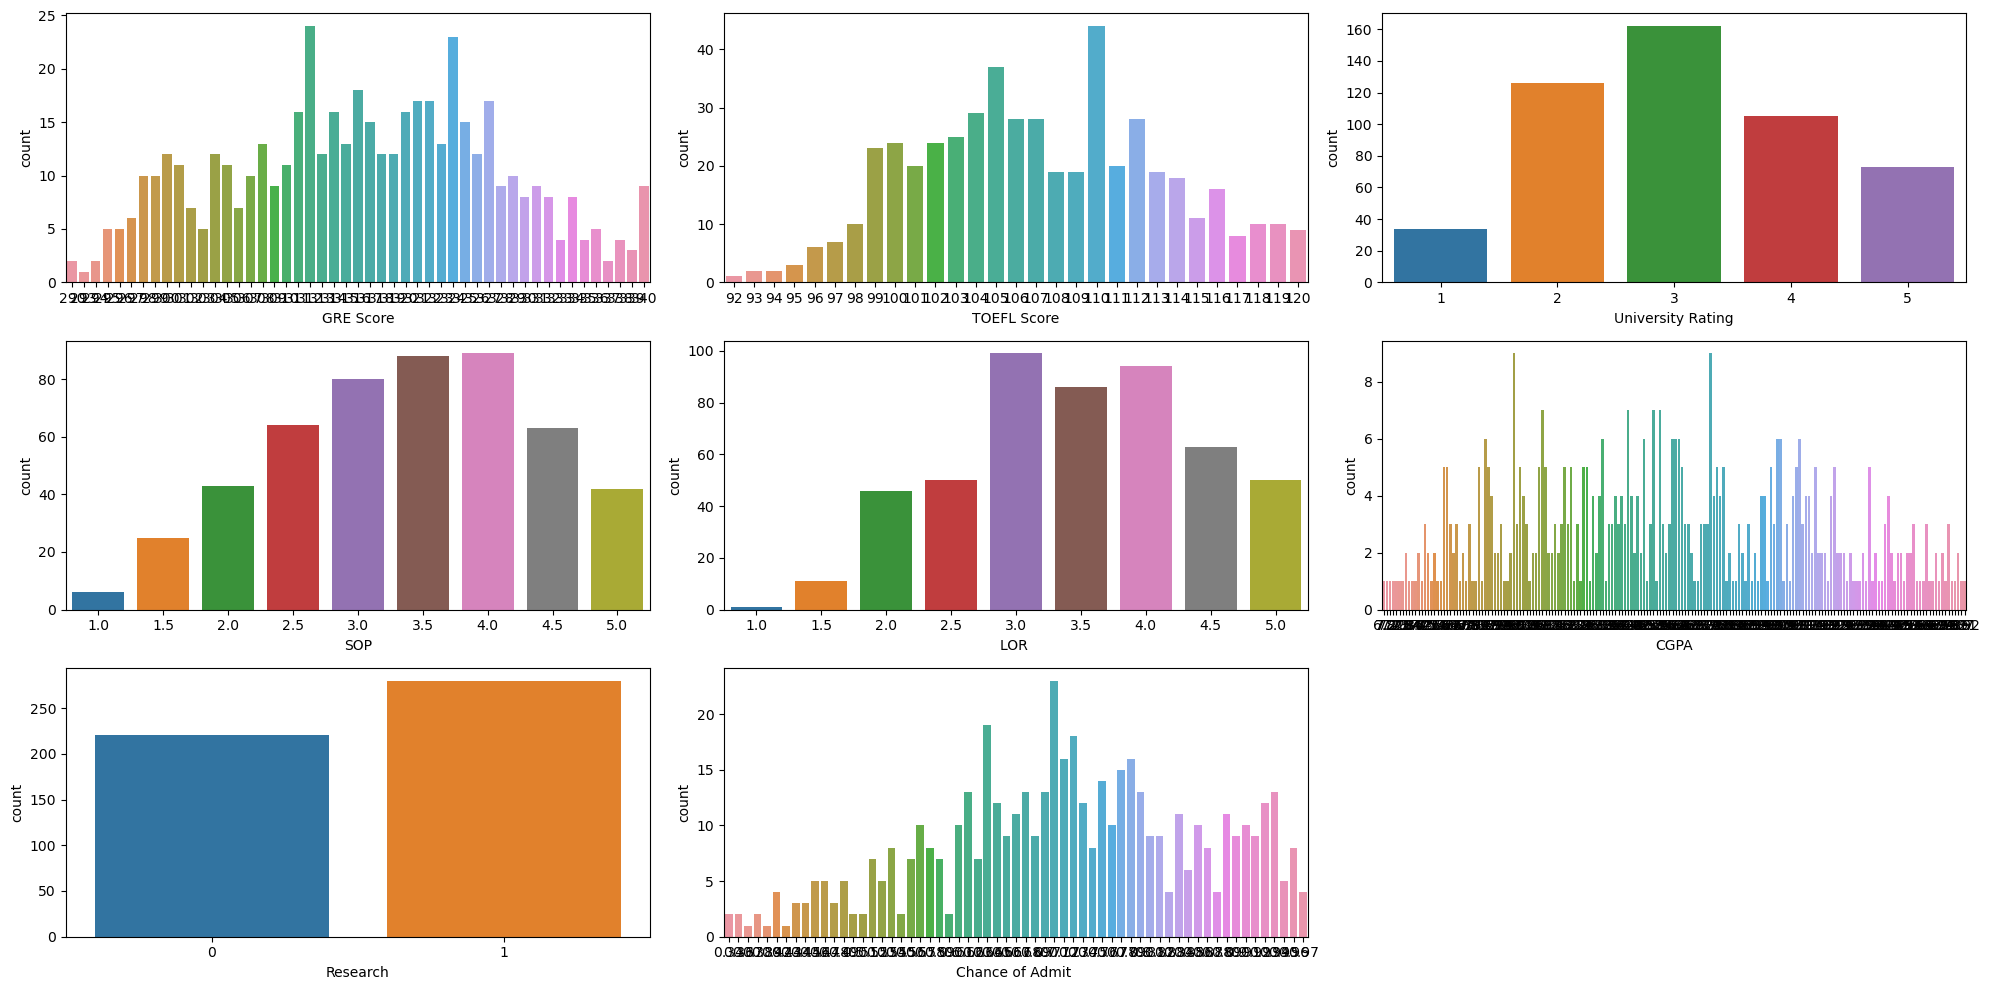

In [16]:
index = 1
plt.figure(figsize=(20,10))
for feature in df_new.columns:
    plt.subplot(3,3, index)
    sns.countplot(x=df_new[feature])
    plt.tight_layout()
    index+=1

<AxesSubplot:>

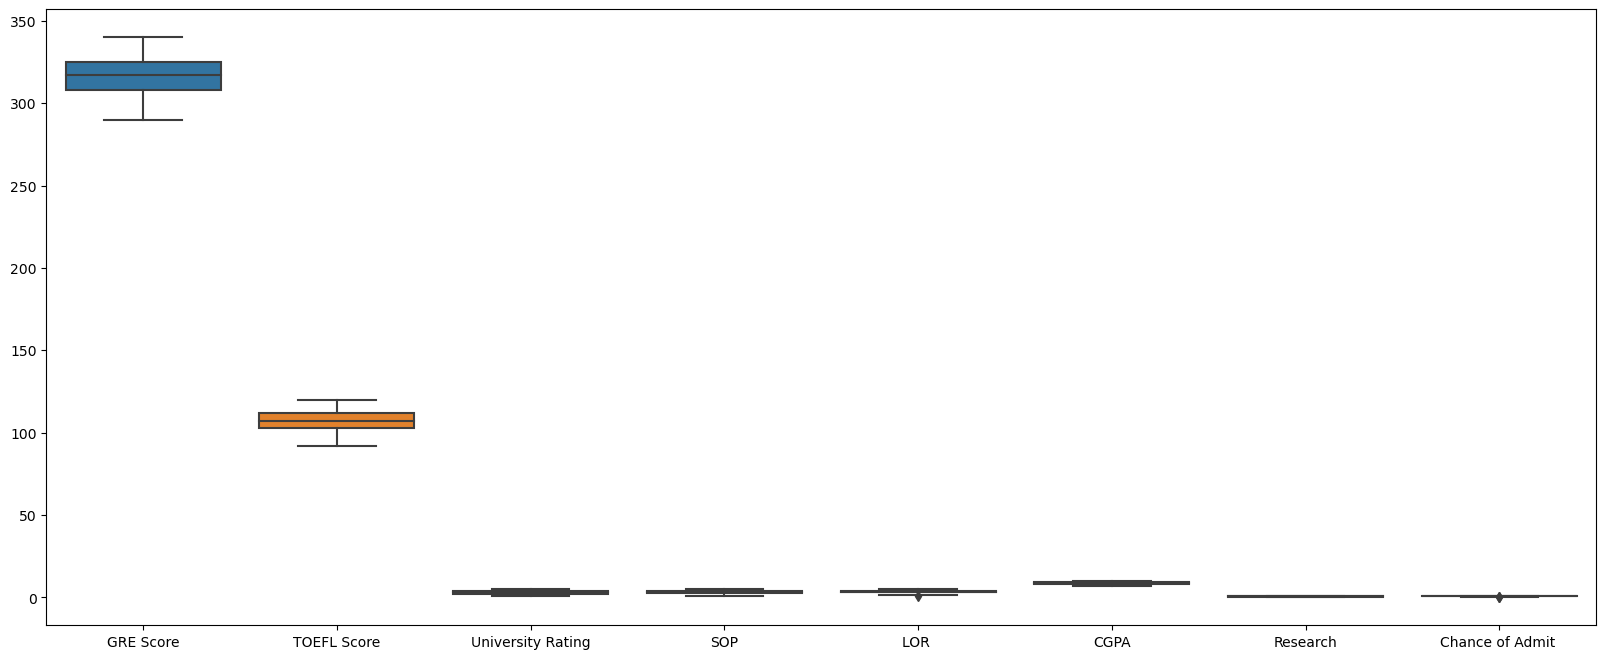

In [19]:
plt.figure(figsize=(20,8))
sns.boxplot(data=df_new)

In [20]:
df_new.corr()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
GRE Score,1.000000,0.827200,0.635376,0.613498,0.524679,0.825878,0.563398,0.810351
TOEFL Score,0.827200,1.000000,0.649799,0.644410,0.541563,0.810574,0.467012,0.792228
University Rating,0.635376,0.649799,1.000000,0.728024,0.608651,0.705254,0.427047,0.690132
SOP,0.613498,0.644410,0.728024,1.000000,0.663707,0.712154,0.408116,0.684137
LOR,0.524679,0.541563,0.608651,0.663707,1.000000,0.637469,0.372526,0.645365
CGPA,0.825878,0.810574,0.705254,0.712154,0.637469,1.000000,0.501311,0.882413
Research,0.563398,0.467012,0.427047,0.408116,0.372526,0.501311,1.000000,0.545871
Chance of Admit,0.810351,0.792228,0.690132,0.684137,0.645365,0.882413,0.545871,1.000000


<AxesSubplot:>

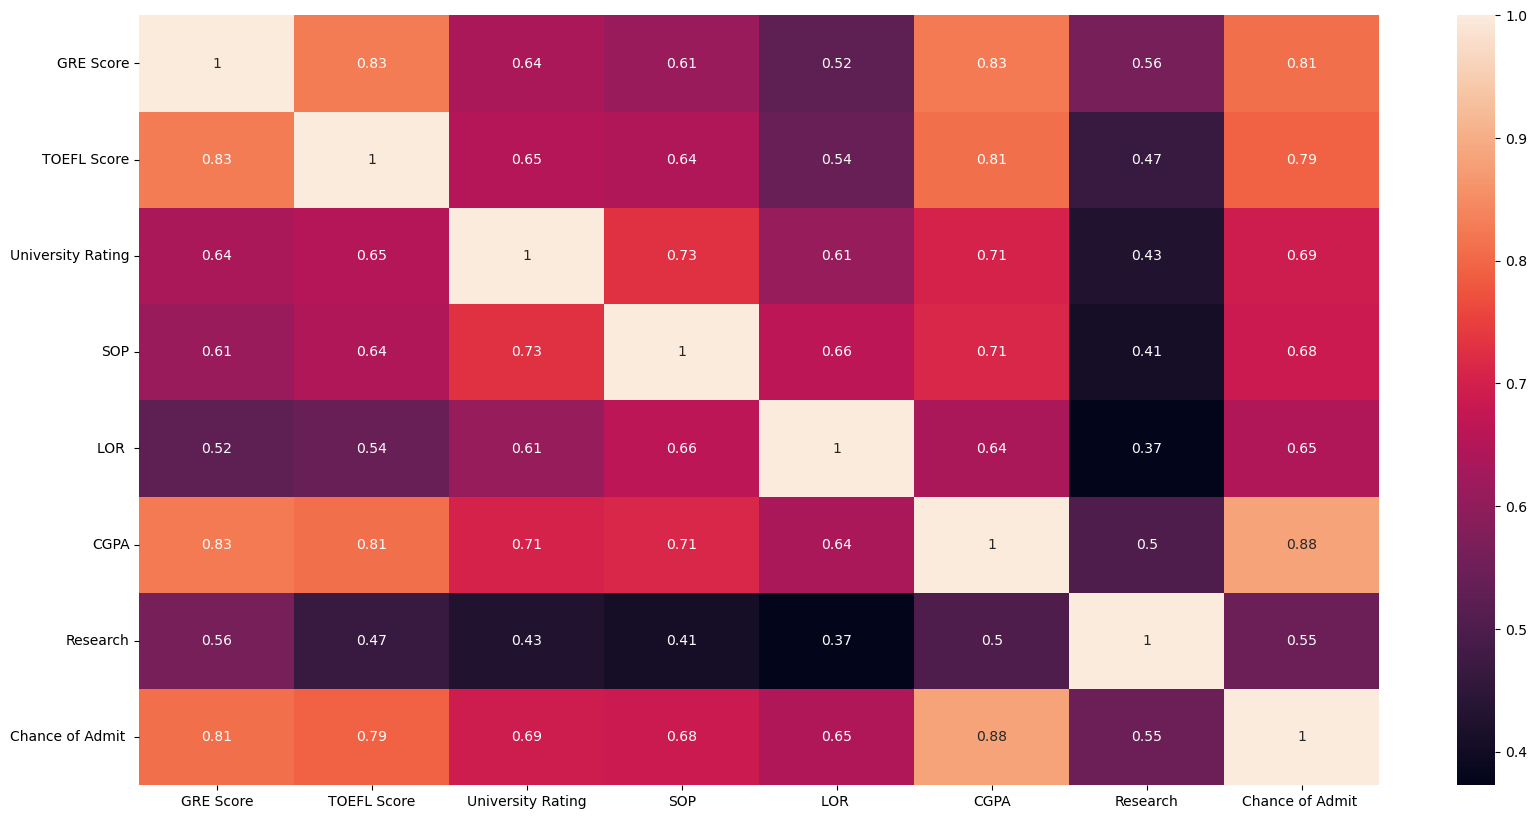

In [21]:
plt.figure(figsize=(20,10))
sns.heatmap(df_new.corr(),annot=True)

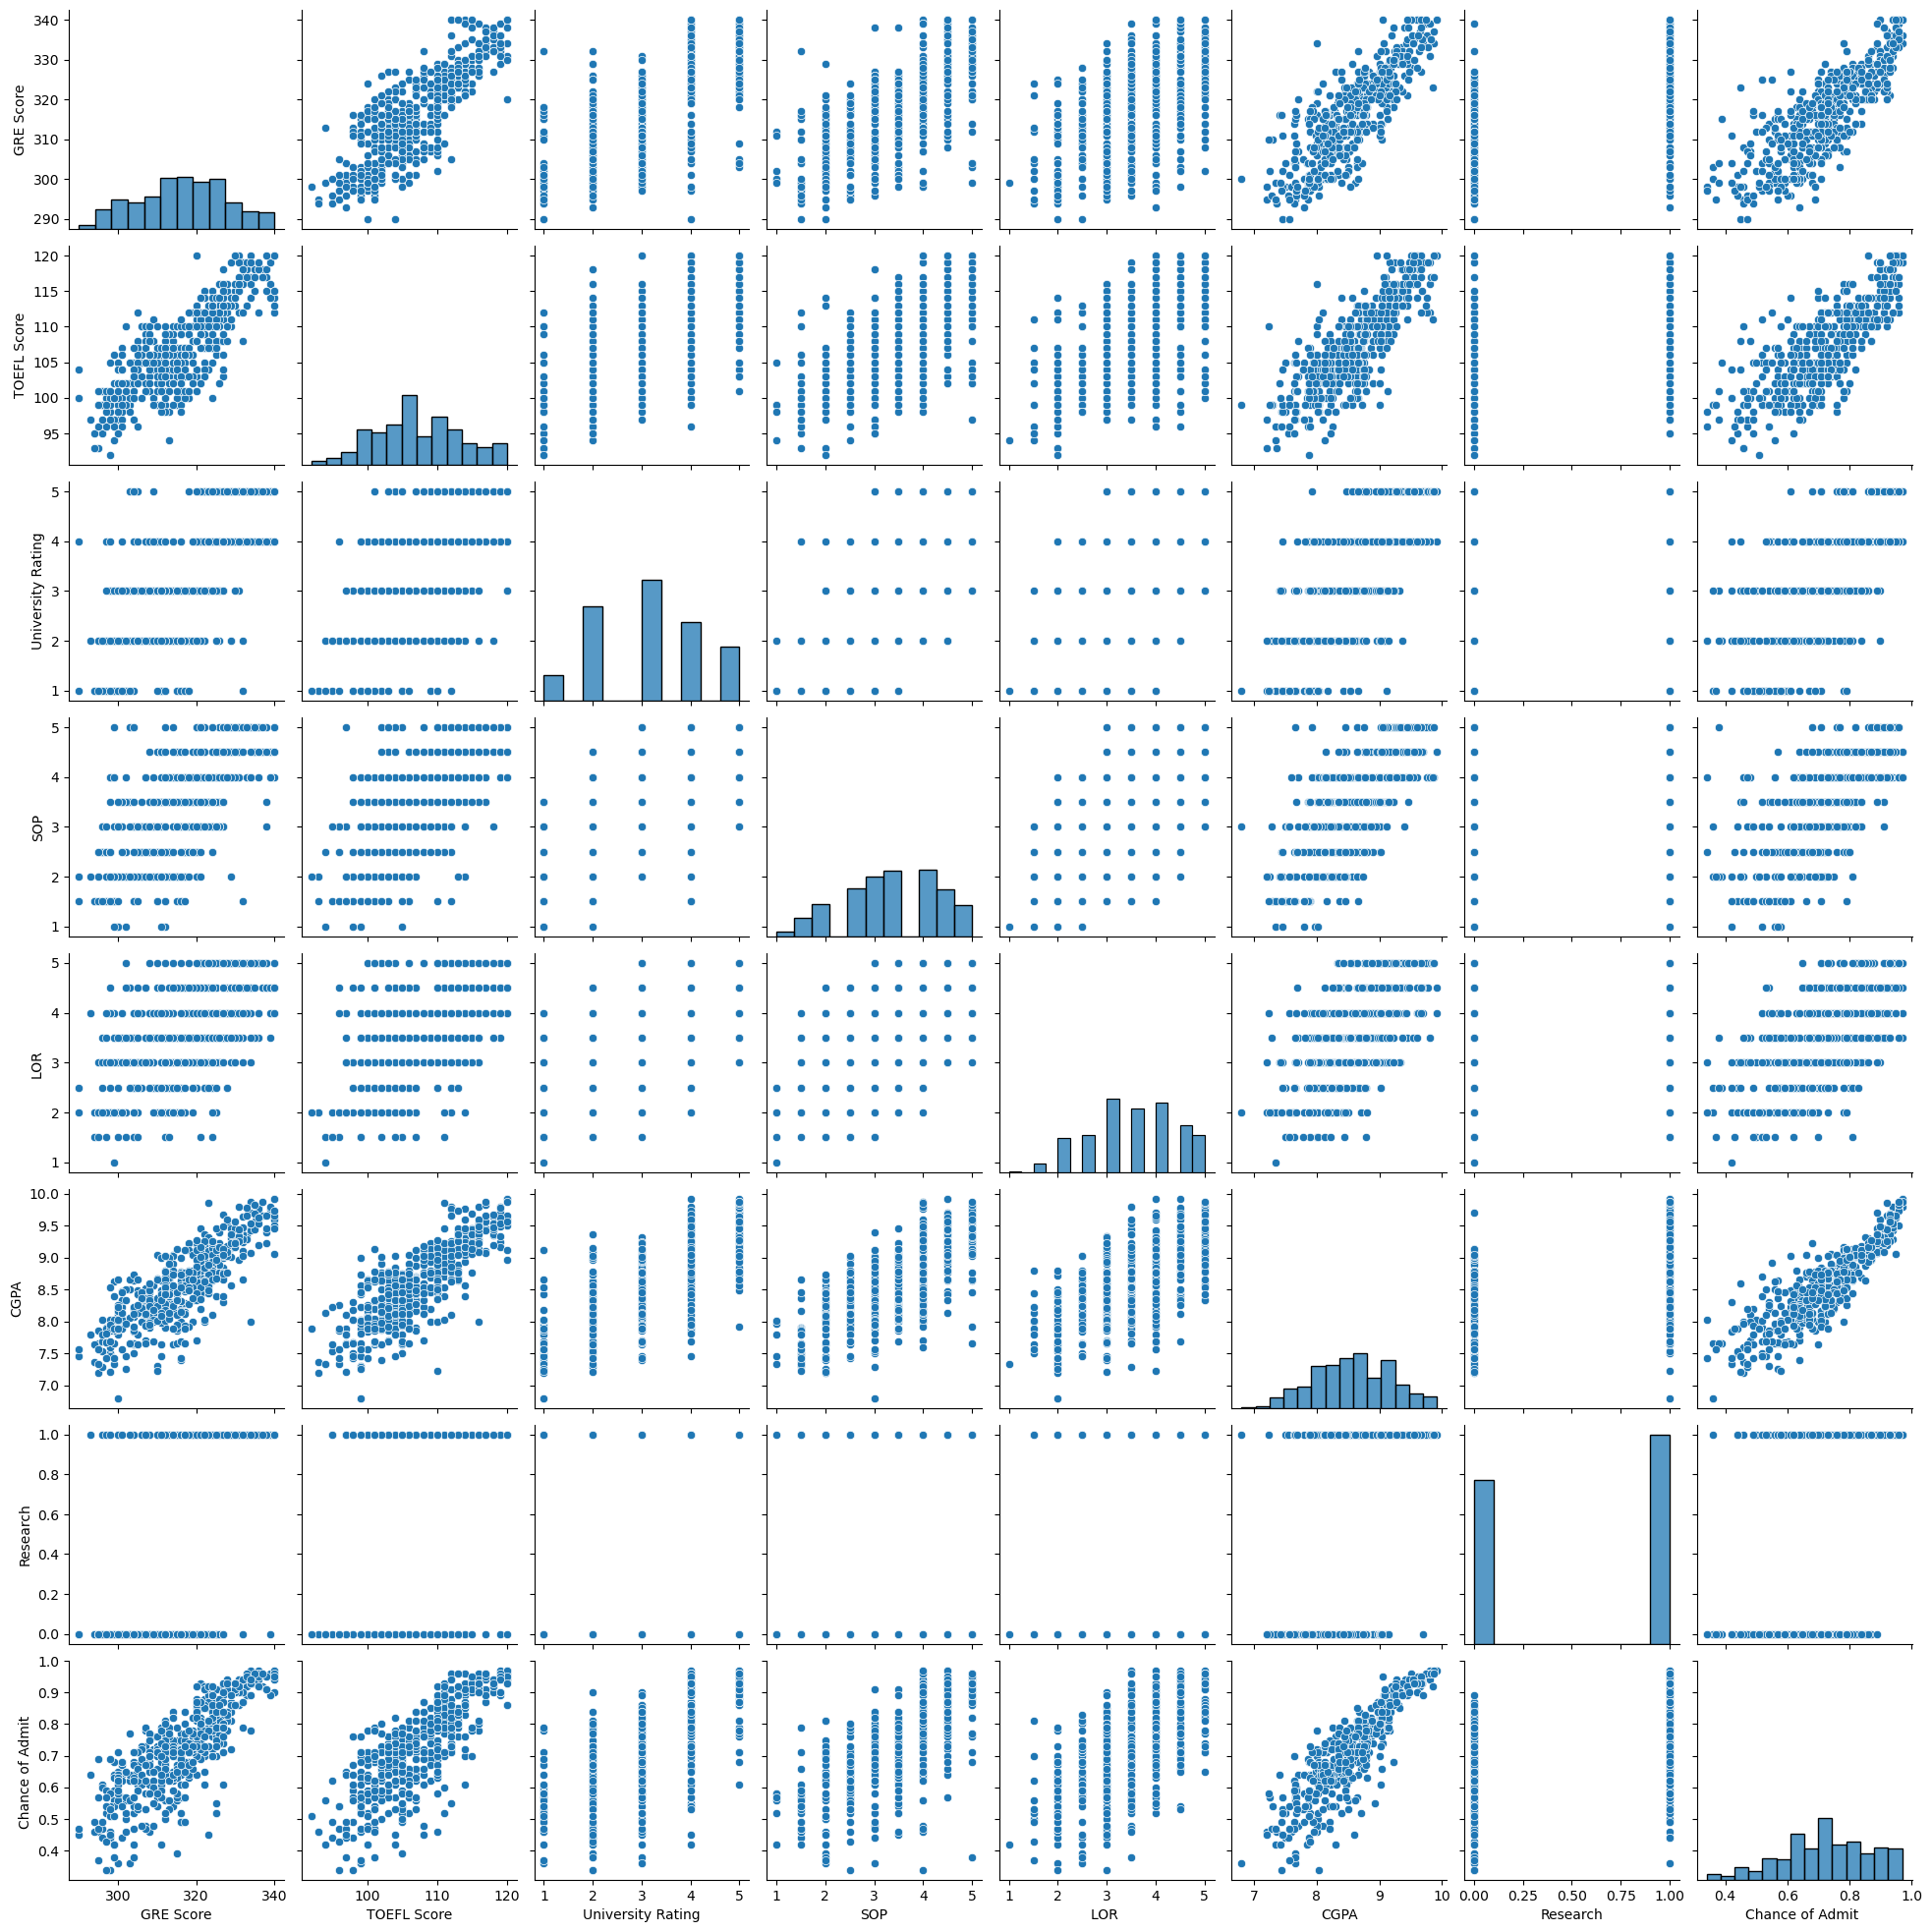

In [22]:
sns.pairplot(df_new)

# Model Selection

In [23]:
X= df_new.iloc[:,:-1]

# y = df_new.iloc[:,-1]

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42, train_size=.20)

In [26]:
print(len(X_train),len(X_test), len(y_train), len(y_test))

100 400 100 400


# Preprocessing of Data

In [27]:
from sklearn.preprocessing import StandardScaler

In [28]:
scaler = StandardScaler()

In [29]:
X_train_ft =  scaler.fit_transform(X_train)

In [30]:
X_test_ft = scaler.transform(X_test)

# SVR Model Training

In [31]:
from sklearn.svm import SVR

In [32]:
svr_model = SVR()

In [34]:
svr_model.fit(X_test_ft,y_test)

SVR()

In [35]:
svr_model.score(X_test_ft,y_test)

0.7787130499087085

# Hyperparameter tuning

In [36]:
from sklearn.model_selection import GridSearchCV

In [38]:
params = {
    "kernel": ['linear', 'poly', 'rbf', 'sigmoid'],
    "C": np.linspace(0.1, 100, 7),
    "gamma": np.linspace(0.1, 1, 7)
}

In [39]:
gs_cv= GridSearchCV(svr_model, param_grid=params, verbose=3)

In [40]:
gs_cv.fit(X_train_ft,y_train)

Fitting 5 folds for each of 196 candidates, totalling 980 fits
[CV 1/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.764 total time=   0.0s
[CV 2/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.812 total time=   0.0s
[CV 3/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.804 total time=   0.0s
[CV 4/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.858 total time=   0.0s
[CV 5/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.852 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.1, kernel=poly;, score=0.805 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.1, kernel=poly;, score=0.404 total time=   0.0s
[CV 3/5] END .....C=0.1, gamma=0.1, kernel=poly;, score=0.700 total time=   0.0s
[CV 4/5] END .....C=0.1, gamma=0.1, kernel=poly;, score=0.705 total time=   0.0s
[CV 5/5] END .....C=0.1, gamma=0.1, kernel=poly;, score=0.631 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.691 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rb

[CV 4/5] END C=16.750000000000004, gamma=0.25, kernel=linear;, score=0.854 total time=   0.0s
[CV 5/5] END C=16.750000000000004, gamma=0.25, kernel=linear;, score=0.849 total time=   0.0s
[CV 1/5] END C=16.750000000000004, gamma=0.25, kernel=poly;, score=0.741 total time=   0.0s
[CV 2/5] END C=16.750000000000004, gamma=0.25, kernel=poly;, score=0.439 total time=   0.0s
[CV 3/5] END C=16.750000000000004, gamma=0.25, kernel=poly;, score=0.119 total time=   0.0s
[CV 4/5] END C=16.750000000000004, gamma=0.25, kernel=poly;, score=0.781 total time=   0.0s
[CV 5/5] END C=16.750000000000004, gamma=0.25, kernel=poly;, score=0.658 total time=   0.0s
[CV 1/5] END C=16.750000000000004, gamma=0.25, kernel=rbf;, score=0.604 total time=   0.0s
[CV 2/5] END C=16.750000000000004, gamma=0.25, kernel=rbf;, score=0.484 total time=   0.0s
[CV 3/5] END C=16.750000000000004, gamma=0.25, kernel=rbf;, score=0.715 total time=   0.0s
[CV 4/5] END C=16.750000000000004, gamma=0.25, kernel=rbf;, score=0.626 total t

[CV 4/5] END C=16.750000000000004, gamma=1.0, kernel=linear;, score=0.854 total time=   0.0s
[CV 5/5] END C=16.750000000000004, gamma=1.0, kernel=linear;, score=0.849 total time=   0.0s
[CV 1/5] END C=16.750000000000004, gamma=1.0, kernel=poly;, score=0.741 total time=   0.0s
[CV 2/5] END C=16.750000000000004, gamma=1.0, kernel=poly;, score=0.439 total time=   0.0s
[CV 3/5] END C=16.750000000000004, gamma=1.0, kernel=poly;, score=0.119 total time=   0.0s
[CV 4/5] END C=16.750000000000004, gamma=1.0, kernel=poly;, score=0.781 total time=   0.0s
[CV 5/5] END C=16.750000000000004, gamma=1.0, kernel=poly;, score=0.658 total time=   0.0s
[CV 1/5] END C=16.750000000000004, gamma=1.0, kernel=rbf;, score=0.360 total time=   0.0s
[CV 2/5] END C=16.750000000000004, gamma=1.0, kernel=rbf;, score=0.199 total time=   0.0s
[CV 3/5] END C=16.750000000000004, gamma=1.0, kernel=rbf;, score=0.499 total time=   0.0s
[CV 4/5] END C=16.750000000000004, gamma=1.0, kernel=rbf;, score=0.450 total time=   0.0s

[CV 4/5] END C=33.400000000000006, gamma=1.0, kernel=linear;, score=0.854 total time=   0.0s
[CV 5/5] END C=33.400000000000006, gamma=1.0, kernel=linear;, score=0.849 total time=   0.0s
[CV 1/5] END C=33.400000000000006, gamma=1.0, kernel=poly;, score=0.741 total time=   0.0s
[CV 2/5] END C=33.400000000000006, gamma=1.0, kernel=poly;, score=0.439 total time=   0.0s
[CV 3/5] END C=33.400000000000006, gamma=1.0, kernel=poly;, score=0.119 total time=   0.0s
[CV 4/5] END C=33.400000000000006, gamma=1.0, kernel=poly;, score=0.781 total time=   0.0s
[CV 5/5] END C=33.400000000000006, gamma=1.0, kernel=poly;, score=0.658 total time=   0.0s
[CV 1/5] END C=33.400000000000006, gamma=1.0, kernel=rbf;, score=0.360 total time=   0.0s
[CV 2/5] END C=33.400000000000006, gamma=1.0, kernel=rbf;, score=0.199 total time=   0.0s
[CV 3/5] END C=33.400000000000006, gamma=1.0, kernel=rbf;, score=0.499 total time=   0.0s
[CV 4/5] END C=33.400000000000006, gamma=1.0, kernel=rbf;, score=0.450 total time=   0.0s

[CV 4/5] END C=50.050000000000004, gamma=0.85, kernel=linear;, score=0.854 total time=   0.0s
[CV 5/5] END C=50.050000000000004, gamma=0.85, kernel=linear;, score=0.849 total time=   0.0s
[CV 1/5] END C=50.050000000000004, gamma=0.85, kernel=poly;, score=0.741 total time=   0.0s
[CV 2/5] END C=50.050000000000004, gamma=0.85, kernel=poly;, score=0.439 total time=   0.0s
[CV 3/5] END C=50.050000000000004, gamma=0.85, kernel=poly;, score=0.118 total time=   0.0s
[CV 4/5] END C=50.050000000000004, gamma=0.85, kernel=poly;, score=0.781 total time=   0.0s
[CV 5/5] END C=50.050000000000004, gamma=0.85, kernel=poly;, score=0.658 total time=   0.0s
[CV 1/5] END C=50.050000000000004, gamma=0.85, kernel=rbf;, score=0.398 total time=   0.0s
[CV 2/5] END C=50.050000000000004, gamma=0.85, kernel=rbf;, score=0.235 total time=   0.0s
[CV 3/5] END C=50.050000000000004, gamma=0.85, kernel=rbf;, score=0.530 total time=   0.0s
[CV 4/5] END C=50.050000000000004, gamma=0.85, kernel=rbf;, score=0.479 total t

[CV 2/5] END C=66.7, gamma=0.5499999999999999, kernel=linear;, score=0.800 total time=   0.0s
[CV 3/5] END C=66.7, gamma=0.5499999999999999, kernel=linear;, score=0.835 total time=   0.0s
[CV 4/5] END C=66.7, gamma=0.5499999999999999, kernel=linear;, score=0.854 total time=   0.0s
[CV 5/5] END C=66.7, gamma=0.5499999999999999, kernel=linear;, score=0.848 total time=   0.0s
[CV 1/5] END C=66.7, gamma=0.5499999999999999, kernel=poly;, score=0.741 total time=   0.0s
[CV 2/5] END C=66.7, gamma=0.5499999999999999, kernel=poly;, score=0.440 total time=   0.0s
[CV 3/5] END C=66.7, gamma=0.5499999999999999, kernel=poly;, score=0.119 total time=   0.0s
[CV 4/5] END C=66.7, gamma=0.5499999999999999, kernel=poly;, score=0.781 total time=   0.0s
[CV 5/5] END C=66.7, gamma=0.5499999999999999, kernel=poly;, score=0.658 total time=   0.0s
[CV 1/5] END C=66.7, gamma=0.5499999999999999, kernel=rbf;, score=0.482 total time=   0.0s
[CV 2/5] END C=66.7, gamma=0.5499999999999999, kernel=rbf;, score=0.329 t

[CV 5/5] END C=83.35000000000001, gamma=0.4, kernel=linear;, score=0.849 total time=   0.0s
[CV 1/5] END C=83.35000000000001, gamma=0.4, kernel=poly;, score=0.741 total time=   0.0s
[CV 2/5] END C=83.35000000000001, gamma=0.4, kernel=poly;, score=0.439 total time=   0.0s
[CV 3/5] END C=83.35000000000001, gamma=0.4, kernel=poly;, score=0.118 total time=   0.0s
[CV 4/5] END C=83.35000000000001, gamma=0.4, kernel=poly;, score=0.781 total time=   0.0s
[CV 5/5] END C=83.35000000000001, gamma=0.4, kernel=poly;, score=0.658 total time=   0.0s
[CV 1/5] END C=83.35000000000001, gamma=0.4, kernel=rbf;, score=0.540 total time=   0.0s
[CV 2/5] END C=83.35000000000001, gamma=0.4, kernel=rbf;, score=0.397 total time=   0.0s
[CV 3/5] END C=83.35000000000001, gamma=0.4, kernel=rbf;, score=0.650 total time=   0.0s
[CV 4/5] END C=83.35000000000001, gamma=0.4, kernel=rbf;, score=0.576 total time=   0.0s
[CV 5/5] END C=83.35000000000001, gamma=0.4, kernel=rbf;, score=0.615 total time=   0.0s
[CV 1/5] END 

[CV 4/5] END C=100.0, gamma=0.25, kernel=linear;, score=0.854 total time=   0.0s
[CV 5/5] END C=100.0, gamma=0.25, kernel=linear;, score=0.849 total time=   0.0s
[CV 1/5] END ..C=100.0, gamma=0.25, kernel=poly;, score=0.741 total time=   0.0s
[CV 2/5] END ..C=100.0, gamma=0.25, kernel=poly;, score=0.439 total time=   0.0s
[CV 3/5] END ..C=100.0, gamma=0.25, kernel=poly;, score=0.119 total time=   0.0s
[CV 4/5] END ..C=100.0, gamma=0.25, kernel=poly;, score=0.781 total time=   0.0s
[CV 5/5] END ..C=100.0, gamma=0.25, kernel=poly;, score=0.658 total time=   0.0s
[CV 1/5] END ...C=100.0, gamma=0.25, kernel=rbf;, score=0.604 total time=   0.0s
[CV 2/5] END ...C=100.0, gamma=0.25, kernel=rbf;, score=0.484 total time=   0.0s
[CV 3/5] END ...C=100.0, gamma=0.25, kernel=rbf;, score=0.715 total time=   0.0s
[CV 4/5] END ...C=100.0, gamma=0.25, kernel=rbf;, score=0.626 total time=   0.0s
[CV 5/5] END ...C=100.0, gamma=0.25, kernel=rbf;, score=0.633 total time=   0.0s
[CV 1/5] END C=100.0, gamma=

[CV 4/5] END .C=100.0, gamma=1.0, kernel=linear;, score=0.854 total time=   0.0s
[CV 5/5] END .C=100.0, gamma=1.0, kernel=linear;, score=0.849 total time=   0.0s
[CV 1/5] END ...C=100.0, gamma=1.0, kernel=poly;, score=0.741 total time=   0.0s
[CV 2/5] END ...C=100.0, gamma=1.0, kernel=poly;, score=0.439 total time=   0.0s
[CV 3/5] END ...C=100.0, gamma=1.0, kernel=poly;, score=0.119 total time=   0.0s
[CV 4/5] END ...C=100.0, gamma=1.0, kernel=poly;, score=0.781 total time=   0.0s
[CV 5/5] END ...C=100.0, gamma=1.0, kernel=poly;, score=0.658 total time=   0.0s
[CV 1/5] END ....C=100.0, gamma=1.0, kernel=rbf;, score=0.360 total time=   0.0s
[CV 2/5] END ....C=100.0, gamma=1.0, kernel=rbf;, score=0.199 total time=   0.0s
[CV 3/5] END ....C=100.0, gamma=1.0, kernel=rbf;, score=0.499 total time=   0.0s
[CV 4/5] END ....C=100.0, gamma=1.0, kernel=rbf;, score=0.450 total time=   0.0s
[CV 5/5] END ....C=100.0, gamma=1.0, kernel=rbf;, score=0.411 total time=   0.0s
[CV 1/5] END C=100.0, gamma=

GridSearchCV(estimator=SVR(),
             param_grid={'C': array([  0.1 ,  16.75,  33.4 ,  50.05,  66.7 ,  83.35, 100.  ]),
                         'gamma': array([0.1 , 0.25, 0.4 , 0.55, 0.7 , 0.85, 1.  ]),
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             verbose=3)

In [41]:
print(gs_cv.best_params_)

{'C': 16.750000000000004, 'gamma': 0.1, 'kernel': 'linear'}


In [42]:
print(gs_cv.best_score_)

0.8204403194924395


# Performance Metrices

In [43]:
from sklearn.metrics import r2_score

In [45]:
y_predict = svr_model.predict(X_test_ft)

In [46]:
r2_score(y_test, y_predict)

0.7787130499087085

# Cross validation

In [47]:
svr_model.predict([X.iloc[0]])

array([0.68041658])

In [48]:
df_new.iloc[0]

GRE Score            337.00
TOEFL Score          118.00
University Rating      4.00
SOP                    4.50
LOR                    4.50
CGPA                   9.65
Research               1.00
Chance of Admit        0.92
Name: 0, dtype: float64

# Pickling the model

In [49]:

import pickle

In [50]:
pickle.dump(svr_model, open('admission_prediction_svr_model.pkl', 'wb'))